In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [258]:
#Set Directory
path = "D:/1_Learning/PACMANN/Intro Probability/Project 1/"
os.chdir(path)
Input = path + "Input/"
Output = path + "Output/"

In [259]:
#Read Data
df=pd.read_csv(Input+"insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [260]:
#Missing Value Check
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# **Descriptive Statistics**

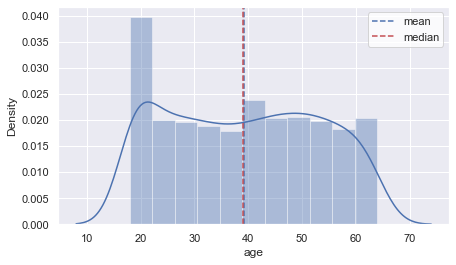

Average of age users is 39 years old
Median of age users is 39 years old
Standard deviation of age user is 14.05 years old


In [261]:
fig = plt.figure(figsize=(7, 4))
p = sns.distplot(df["age"], kde=True)
sns.set_style("white")
average_age=df["age"].mean()
median_age=np.median(df["age"])
std=df["age"].std()

# Mean and Median
line1 = plt.axvline(average_age, color="b", linestyle="--", label = "mean")
line2 = plt.axvline(median_age, color="r", linestyle="--", label = "median")

first_legend = plt.legend(handles=[line1, line2], loc=1)
plt.show()
print(f"Average of age users is {round(average_age)} years old")
print(f"Median of age users is {round(median_age)} years old")
print(f"Standard deviation of age user is {round(std,2)} years old")

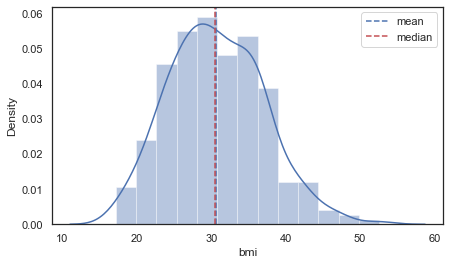

Average of BMI for smoker is 30.71
Median of BMI for smoker is 30.45
Standard deviation of BMI for smoker is 6.32


In [262]:
df_Smoker= df[df["smoker"] == 'yes'] 
df_non_Smoker=df[df["smoker"] == 'no'] 

fig = plt.figure(figsize=(7, 4))
p = sns.distplot(df_Smoker["bmi"], kde=True)
sns.set_style("white")

average_bmi=df_Smoker["bmi"].mean()
median_bmi=np.median(df_Smoker["bmi"])
std=df_Smoker["bmi"].std()

# Mean and Median
line1 = plt.axvline(average_bmi, color="b", linestyle="--", label = "mean")
line2 = plt.axvline(median_bmi, color="r", linestyle="--", label = "median")

first_legend = plt.legend(handles=[line1, line2], loc=1)
plt.show()
print(f"Average of BMI for smoker is {round(average_bmi,2)}")
print(f"Median of BMI for smoker is {round(median_bmi,2)}")
print(f"Standard deviation of BMI for smoker is {round(std,2)}")

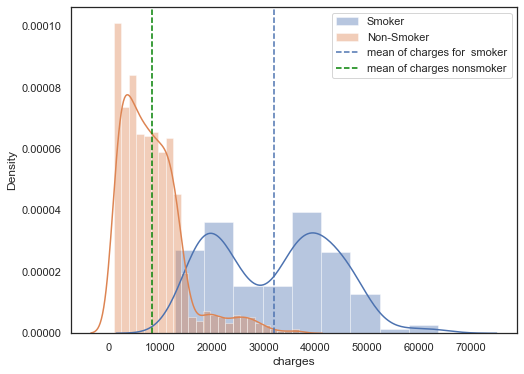

Standar Deviation of Charges for smoker is 11541.55
Standar Deviation of Charges for nonsmoker is 5993.78
Average of Charges for smoker is 32050.23
Average of Charges for nonsmoker is 8434.27


In [263]:
fig = plt.figure(figsize=(8, 6))
p0 = sns.distplot(df_Smoker["charges"], kde=True, label="Smoker")
p1=sns.distplot(df_non_Smoker["charges"], kde=True, label="Non-Smoker")
sns.set_style("white")
std_charges_smoker=df_Smoker["charges"].std()
std_charges_nonsmoker=df_non_Smoker["charges"].std()

mean_charges_smoker=df_Smoker["charges"].mean()
mean_charges_nonsmoker=df_non_Smoker["charges"].mean()

# Mean 
line1 = plt.axvline(mean_charges_smoker, color="b", linestyle="--", label = "mean of charges for  smoker")
line2 = plt.axvline(mean_charges_nonsmoker, color="green", linestyle="--", label = "mean of charges nonsmoker")

plt.legend ()
plt.show()

print(f"Standar Deviation of Charges for smoker is {round(std_charges_smoker,2)}")
print(f"Standar Deviation of Charges for nonsmoker is {round(std_charges_nonsmoker,2)}")

print(f"Average of Charges for smoker is {round(mean_charges_smoker,2)}")
print(f"Average of Charges for nonsmoker is {round(mean_charges_nonsmoker,2)}")


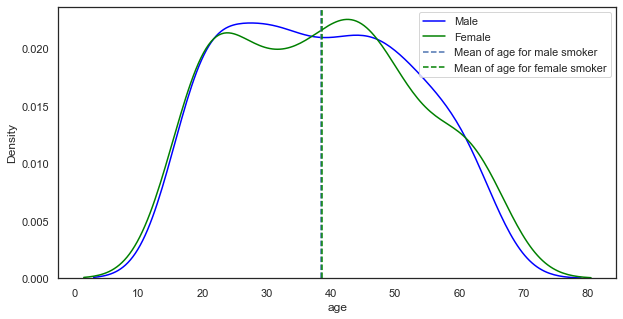

Average of age for male smoker is 38.45
Average of age for female smoker is 38.61


In [264]:
df_Smoker_Male=df_Smoker[df_Smoker["sex"] == 'male']
df_Smoker_Female=df_Smoker[df_Smoker["sex"] == 'female']

sns.set_style("white")
fig = plt.figure(figsize=(10, 5))
p0 = sns.distplot(df_Smoker_Male["age"], kde=True, hist=False, label="Male", color="blue")
p1=sns.distplot(df_Smoker_Female["age"], kde=True, hist=False, label="Female", color="green")

mean_age_smoker_male=df_Smoker_Male["age"].mean()
mean_age_smoker_female=df_Smoker_Female["age"].mean()

# Mean 
line1 = plt.axvline(mean_age_smoker_male, color="b", linestyle="--", label = "Mean of age for male smoker")
line2 = plt.axvline(mean_age_smoker_female, color="green", linestyle="--", label = "Mean of age for female smoker")
plt.legend(loc=1)
plt.show()

print(f"Average of age for male smoker is {round(mean_age_smoker_male,2)}")
print(f"Average of age for female smoker is {round(mean_age_smoker_female,2)}")

# **PMF**

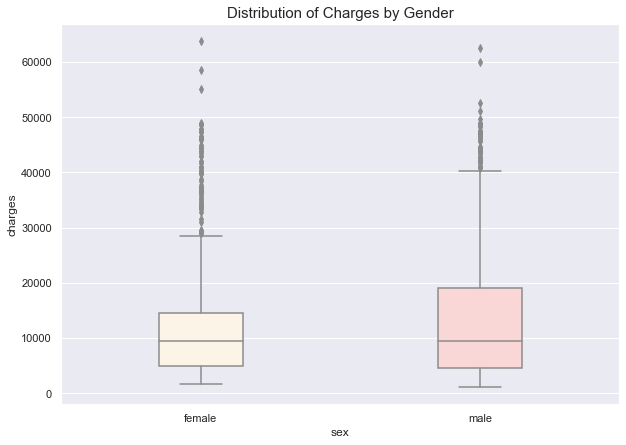

Highest charges is 63770.42801 from ['female']


In [265]:
#Boxplot of Charges
fig = plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
my_pal = {"male": "#FFD1D1", "female": "#FFF5E4"}
sns.boxplot( x=df["sex"], y=df["charges"], width=0.3, palette=my_pal)

plt.title("Distribution of Charges by Gender", size=15)
plt.show()

max_charges=df["charges"].max()
Gender_base_on_max=df[df["charges"]==df["charges"].max()]["sex"]

print(f"Highest charges is {max_charges} from {Gender_base_on_max.values}")

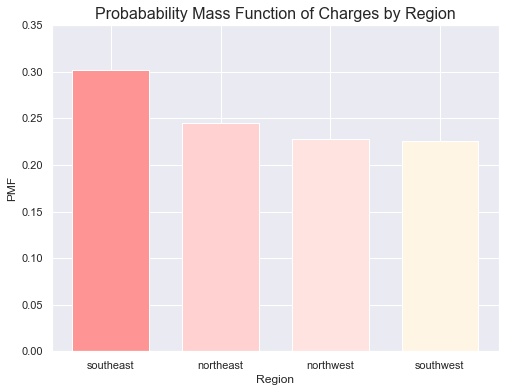

In [266]:
#Calculate PMF
region_pmf= df[["region", "charges"]].groupby("region").sum()
region_pmf["PMF"]=region_pmf["charges"]/region_pmf["charges"].sum()
region_pmf=region_pmf.sort_values(by=['PMF'], ascending=False)
fig = plt.figure(figsize = (8, 6))
 
plt.bar(region_pmf.index, region_pmf["PMF"], color =["#FF9494","#FFD1D1","#FFE3E1","#FFF5E4"],
        width = 0.7)
plt.ylim(0, 0.35)
plt.xlabel("Region")
plt.ylabel("PMF")
plt.title("Probabability Mass Function of Charges by Region", size= 16)
plt.show()

In [267]:
#Calculate Proportion of number of people for each region
df_by_region=pd.DataFrame(df.groupby('region').size())
df_by_region.columns = ['Number of People']
df_by_region["Proportion"]= df_by_region['Number of People']/df_by_region['Number of People'].sum()

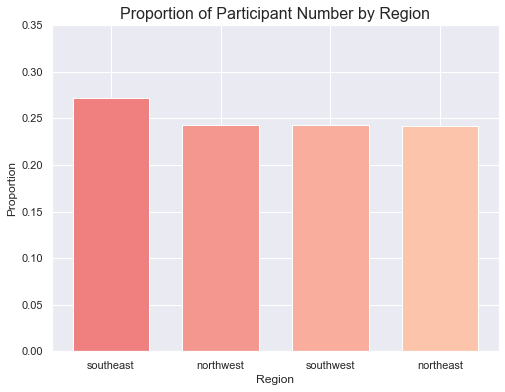

In [268]:
region_proportion=df_by_region.sort_values(by=['Proportion'], ascending=False)
fig = plt.figure(figsize = (8, 6))

plt.bar(region_proportion.index, region_proportion['Proportion'], color =["#f08080","#f4978e","#f8ad9d","#fbc4ab"],
        width = 0.7)
plt.ylim(0, 0.35)
plt.xlabel("Region")
plt.ylabel("Proportion")
plt.title("Proportion of Participant Number by Region", size= 16)
plt.show()

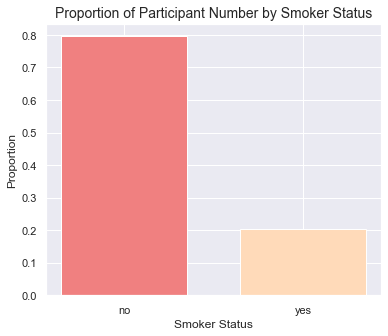

In [269]:
#Calculate Proportion of number of people for each region
df_by_smoker_status=pd.DataFrame(df.groupby('smoker').size())
df_by_smoker_status.columns = ['Number of People']
df_by_smoker_status["Proportion"]= df_by_smoker_status['Number of People']/df_by_smoker_status['Number of People'].sum()
df_by_smoker_status.head()

smoker_proportion=df_by_smoker_status.sort_values(by=['Proportion'], ascending=False)
fig = plt.figure(figsize = (6, 5))

plt.bar(smoker_proportion.index, smoker_proportion['Proportion'], color =["#f08080","#ffdab9"],
        width = 0.7)
plt.xlabel("Smoker Status")
plt.ylabel("Proportion")
plt.title("Proportion of Participant Number by Smoker Status", size= 14)
plt.show()

In [270]:
#Creating a Contingency
new_df=pd.crosstab(df.sex, df.smoker, margins=True , margins_name="Total")

#P(X= Perempuan & Merokok)/P(Merokok)
P_F_YES = new_df.loc[("female", "yes")] /  new_df.loc[("Total", "yes")]
print(f' P(X= Female & Smoker)/P(Smoker) is {P_F_YES}')

#P(X= Laki-Laki & Merokok)/P(Merokok)
P_M_YES = new_df.loc[("male", "yes")] /  new_df.loc[("Total", "yes")]
print(f' P(X= Male & Smoker )/P(Smoker) is {P_M_YES}')


 P(X= Female & Smoker)/P(Smoker) is 0.4197080291970803
 P(X= Male & Smoker )/P(Smoker) is 0.5802919708029197


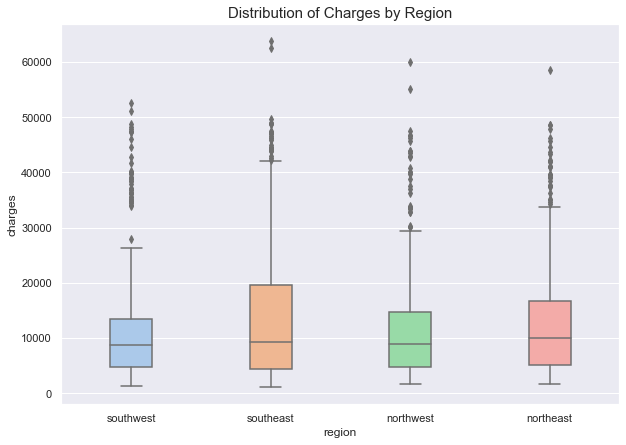

In [271]:
#Boxplot of Charges
fig = plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")

sns.boxplot(x=df["region"], y=df["charges"], width=0.3, palette = "pastel")

plt.title("Distribution of Charges by Region", size=15)
plt.show()


# **PDF**

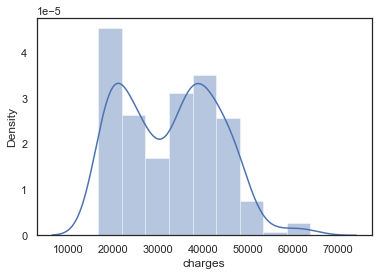

In [288]:
#Desnisty Plot for BMI more than 25 and charge more than 16700
sns.set_style("white")
condition = (df['bmi']>25) & (df['charges']>16700)
charges_given_bmi = df[condition]['charges']
sns.distplot(charges_given_bmi, axlabel='charges', kde=True)

plt.show()

In [273]:
df["BMI_Categorical_more_25"] = np.where(df['bmi'] > 25 , "yes", "no")
df_more_than_25_yes=df[df["BMI_Categorical_more_25"]=="yes"]

Len_Charge_bmi_more_25_yes= len(df_more_than_25_yes[df_more_than_25_yes["charges"] > 16700])

P_more_than_25_yes_charge = Len_Charge_bmi_more_25_yes/ len(df_more_than_25_yes)
print(f' P(X= charge more than 16.700 & BMI  more than 25)/P(BMI  more than 25) is {P_more_than_25_yes_charge}')

 P(X= charge more than 16.700 & BMI  more than 25)/P(BMI  more than 25) is 0.25939505041246563


In [274]:
Len_Charge_smoker = len(df[(df['charges']>16700) & (df['smoker']=="yes")])
P_charge_more_tah_16700_smoker = Len_Charge_smoker/ len(df[df['smoker']=="yes"])

print(f' P(X= charge more than 16.700 & smoker)/P(smoker) is {P_charge_more_tah_16700_smoker}')


 P(X= charge more than 16.700 & smoker)/P(smoker) is 0.927007299270073


In [275]:
df["BMI_Categorical_more_25"] = np.where(df['bmi'] > 25 , "yes", "no")
df_more_than_25_yes=df[df["BMI_Categorical_more_25"]=="yes"]
df_more_than_25_no=df[df["BMI_Categorical_more_25"]=="no"]

Len_Charge_bmi_more_25_yes= len(df_more_than_25_yes[df_more_than_25_yes["charges"] > 16700])
Len_Charge_bmi_more_25_no= len(df_more_than_25_no[df_more_than_25_no["charges"] > 16700])


P_more_than_25_yes_charge = Len_Charge_bmi_more_25_yes/ len(df_more_than_25_yes)
print(f' P(X= charge more than 16.700 & BMI  more than 25)/P(BMI  more than 25) is {P_more_than_25_yes_charge}')


P_more_than_25_no_charge = Len_Charge_bmi_more_25_no/ len(df_more_than_25_no)
print(f' P(X= charge more than 16.700 & BMI  less than 25)/P(BMI  less than 25) is {P_more_than_25_no_charge}')


 P(X= charge more than 16.700 & BMI  more than 25)/P(BMI  more than 25) is 0.25939505041246563
 P(X= charge more than 16.700 & BMI  less than 25)/P(BMI  less than 25) is 0.20647773279352227


In [276]:
condition_smoker = df[(df['bmi']>25) & (df['charges']>16700) &  (df['smoker']=="yes")]
P_more_than_25_yes_charge_smoker= len(condition_smoker)/(len(df[(df['bmi']>25) & (df['smoker']=="yes")]))
print(f' P(X= charge more than 16.700 & BMI  more than 25 & Smoker)/P(Smoker & BMI > 25 ) is {P_more_than_25_yes_charge_smoker}')

 P(X= charge more than 16.700 & BMI  more than 25 & Smoker)/P(Smoker & BMI > 25 ) is 0.9817351598173516


In [277]:
condition_no_smoker = df[(df['bmi']>25) & (df['charges']>16700) &  (df['smoker']=="no")]
P_more_than_25_yes_charge_no_smoker= len(condition_no_smoker)/ (len(df[(df['bmi']>25) & (df['smoker']=="no")]))
print(f' P(X= charge more than 16.700 & BMI  more than 25 & noSmoker)/P(Smoker & BMI > 25 ) is {P_more_than_25_yes_charge_no_smoker}')

 P(X= charge more than 16.700 & BMI  more than 25 & noSmoker)/P(Smoker & BMI > 25 ) is 0.0779816513761468


# **Corelation**

In [278]:

from sklearn.preprocessing import LabelEncoder
import numpy as np

df1=df

# the encoder
lb_make = LabelEncoder()
df1["sex_"]= lb_make.fit_transform(df1["sex"]) # convert to numerical
df1["smoker_"]= lb_make.fit_transform(df1["smoker"]) # convert to numerical

df_correl=df1.corr()


<AxesSubplot:>

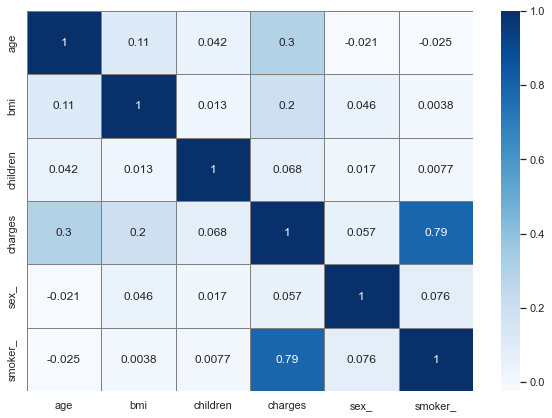

In [279]:
# plot a heatmap with custom grid lines
fig=plt.figure(figsize=(10, 7))
sns.heatmap(df_correl,  cmap="Blues", annot=True, linewidths=1, linecolor='grey')

# **Hypothesis Testing**

**Is the charges of smokers higher than  the charges of non-smokers?**

H0 : Charges for Smokers <= Charges for Non smokers
H1 : Charges for Smokers > Charges for Non smokers

Alpha = 0.05

Statistics Uji : Unequal Variance T-Test

In [280]:
Mean_Smoker_Charges=df.groupby("smoker")["charges"].mean()
Var_Smoker_Charges=df.groupby("smoker")["charges"].var()
std=np.sqrt(Var_Smoker_Charges)
n1=(df["smoker"]=="yes").sum()
n2=(df["smoker"]=="no").sum()

#Using The Welch's t-test (Unequal number of size and variance)
t_score = stats.ttest_ind_from_stats(Mean_Smoker_Charges.yes, std.yes, n1, \
                               Mean_Smoker_Charges.no, std.no, n2, \
                               equal_var=False)

#p values in this test is for two tail test, we can get the p-value of the right-tail : divide this value by 2
P_value_score_right_tail = t_score.pvalue/2
print(f'P value is {round(P_value_score_right_tail,3)} , less than Alpha = 0.05, so we reject null hypothesis and accept alternative hypothesis')      

P value is 0.0 , less than Alpha = 0.05, so we reject null hypothesis and accept alternative hypothesis


In [281]:
#conclusion : Tagihan kesehatan Perokok > Tagihan Data NonPerokok

**Is there any different between male and female BMI ?**

H0 : Male BMI = Female BMI

H1 : Male BMI  ≠  Female BMI

Alpha = 0.05

Statistics Uji : Unequal Variance T-Test

In [282]:
Mean_Gender_BMI=df.groupby("sex")["bmi"].mean()
Var_Gender_BMI=df.groupby("sex")["bmi"].var()
std=np.sqrt(Var_Gender_BMI)
n1=(df["sex"]=="male").sum()
n2=(df["sex"]=="female").sum()

#Using The Welch's t-test (Unequal number of size and variance)
t_score = stats.ttest_ind_from_stats(Mean_Gender_BMI.male, std.male, n1, \
                               Mean_Gender_BMI.female, std.female, n2, \
                               equal_var=False)

P_value_score_right_tail = t_score.pvalue
print(f'P value is {P_value_score_right_tail} , greater than Alpha = 0.05, so we failed to reject null hypothesis')      

P value is 0.08992430667834857 , greater than Alpha = 0.05, so we failed to reject null hypothesis


In [283]:
#conclusion : There is no difference between Male and Female BMI

**Is the charges of user with BMI more than 25 (p1) higher than  the charges user with BMI less than 25 (p2)?**

H0 : p1 <= p2

H1 :  p1 > p2

Alpha = 0.05

Statistics Uji :Proportion Beetween 2 Sample

In [284]:
df["BMI_Categorical_more_25"] = np.where(df['bmi'] > 25 , "yes", "no")

Mean_Charges_by_BMI=df.groupby("BMI_Categorical_more_25")["charges"].mean()
Var_Charges_by_BMI=df.groupby("BMI_Categorical_more_25")["charges"].var()
std=np.sqrt(Var_Charges_by_BMI)
n1=(df["BMI_Categorical_more_25"]=="yes").sum()
n2=(df["BMI_Categorical_more_25"]=="no").sum()


In [285]:
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import numpy as np


def apply_ztest(c1, c2, n1, n2):
    return proportions_ztest(
        count=[c1 , c2], 
        nobs=[n1, n2], 
        alternative='larger'
      )[1]

z_score= apply_ztest(Mean_Charges_by_BMI.yes, Mean_Charges_by_BMI.no, n1, n2 )

#p values in this test is for two tail test, we can get the p-value of the right-tail : divide this value by 2
P_value_score_right_tail = z_score/2
print(f'P value is {P_value_score_right_tail} , less than Alpha = 0.05, so we reject null hypothesis and accept alternative hypothesis')  

P value is nan , less than Alpha = 0.05, so we reject null hypothesis and accept alternative hypothesis
